# 삼중창 매매 시스템

**같은 시장이라도 지표들이 내는 신호들이 다를 수 있다.**
  
예를 들어, 시장이 상승 추세일때  
-> 추세 추종형 지표 : 매수 신호를 줌.  
-> 오실레이터 : 과매수 상태로 판단해, 매도 신호를 줌.  

따라서 **삼중창 매매 시스템은 한 가지 지표만 사용했을 때의 단점을 보완하고자 추세 추종형 지표와 오실레이터를 적절히 결합해 사용**한다.  


# 첫 번째 창 - 시장 조류(Market Tide)

트레이더의 선택 : 매수/매도/관망 -> 3개의 선택지   
so, 삼중창의 첫 번째 창을 사용해 이 중 한 선택지를 제거할 수 있다.

> **시장이 상승 추세인지? 하락 추세인지? 판단!**  
if 상승 추세, 매수 or 관망  
if 하락 추세, 매도 or 관망  

- 첫 번째 창은 시장 조류, 즉 장기 차트를 분석하는 것!
- 트레이더는 자신이 매매하는 시간 단위보다 한 단계 긴 단위 차트를 이용해 분석하면 됨!  

In [3]:
! pip install pykrx

In [1]:
# 엔씨 소프트 주가 데이터 로딩
from pykrx import stock

# 엔씨소프트 종목코드 036570
df = stock.get_market_ohlcv_by_date(fromdate="20170101", todate="20210403", ticker="036570")
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2017-01-02,246000,248500,241000,248000,84051
2017-01-03,249000,260500,249000,259000,160386
2017-01-04,258000,263000,256500,260000,105440
2017-01-05,260000,263000,259000,261000,67168
2017-01-06,259000,261500,254500,260500,79682
...,...,...,...,...,...
2021-03-29,890000,890000,829000,834000,343144
2021-03-30,834000,852000,834000,845000,180279
2021-03-31,857000,884000,851000,873000,152553


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

ema60 = df.종가.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균
ema130 = df.종가.ewm(span=130).mean() # ② 종가의 26주 지수 이동평균
macd = ema60 - ema130                  # ③ MACD선
signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균)
macdhist = macd - signal               # ⑤ MACD 히스토그램

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
    macdhist=macdhist).dropna()
df

C:\Users\Becky\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


,시가,고가,저가,종가,거래량,ema130,ema60,macd,signal,macdhist
날짜,,,,,,,,,,
2017-01-02,246000,248500,241000,248000,84051,248000.000000,248000.000000,0.000000,0.000000,0.000000
2017-01-03,249000,260500,249000,259000,160386,253542.307692,253591.666667,49.358974,25.227920,24.131054
2017-01-04,258000,263000,256500,260000,105440,255728.072425,255799.370429,71.298004,41.272077,30.025927
2017-01-05,260000,263000,259000,261000,67168,257076.624050,257165.245765,88.621715,53.910073,34.711642
2017-01-06,259000,261500,254500,260500,79682,257782.526959,257877.388343,94.861384,62.844163,32.017221
...,...,...,...,...,...,...,...,...,...,...
2021-03-29,890000,890000,829000,834000,343144,897221.170592,931752.577059,34531.406468,42915.306931,-8383.900463
2021-03-30,834000,852000,834000,845000,180279,896423.900722,928908.230271,32484.329549,42461.786175,-9977.456626
2021-03-31,857000,884000,851000,873000,152553,896066.283877,927075.173540,31008.889663,41963.834153,-10954.944490


C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


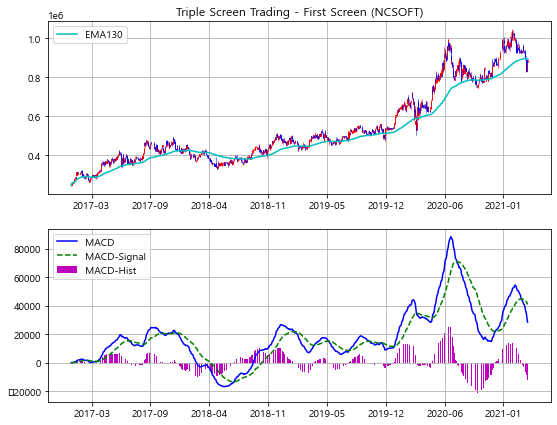

In [3]:
df['number'] = df.index.map(mdates.date2num)  # ⑥ 캔들 차트에 사용할 수 있게 날짜 형 인게스를 숫자형으로 변환
ohlc = df[['number','시가','고가','저가','종가']]

plt.figure(figsize=(9, 7))
p1 = plt.subplot(2, 1, 1)
plt.title('Triple Screen Trading - First Screen (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', 
    colordown='blue')  # ⑦
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')

p2 = plt.subplot(2, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')
plt.show()

결론적으로, 삼중창 매매 시스템의 첫 번째 창에서는 EMA130 그래프가 오르고 있을때만 시장에 참여하면 됨.

# 두 번째 창 - 시장 파도(marked wave)

첫 번째 창의 추세 방향과 역행하는 파도를 파악하는데 오실레이터를 사용한다.  
> 오실레이터는  
when 시장 하락, 매수 기회를 제공  
when 시장 상승, 매도 기회를 제공



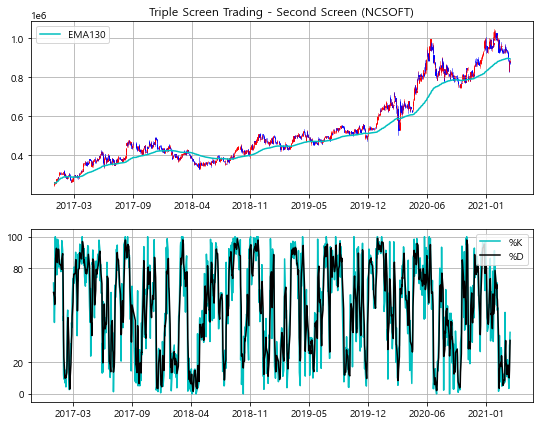

In [6]:
ndays_high = df.고가.rolling(window=14, min_periods=1).max()      # ①
ndays_low = df.저가.rolling(window=14, min_periods=1).min()        # ②
fast_k = (df.종가 - ndays_low) / (ndays_high - ndays_low) * 100  # ③
slow_d= fast_k.rolling(window=3).mean()                           # ④
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()             # ⑤

plt.figure(figsize=(9, 7))
p1 = plt.subplot(2, 1, 1)
plt.title('Triple Screen Trading - Second Screen (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')
p1 = plt.subplot(2, 1, 2)
plt.grid(True)
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0, 20, 80, 100]) # ⑥
plt.legend(loc='best')
plt.show()


In [7]:
df

,시가,고가,저가,종가,거래량,ema130,ema60,macd,signal,macdhist,number,fast_k,slow_d
날짜,,,,,,,,,,,,,
2017-01-06,259000,261500,254500,260500,79682,257782.526959,257877.388343,94.861384,62.844163,32.017221,736335.0,70.588235,64.555053
2017-01-09,260000,271000,259000,262000,155502,258512.749321,258622.999036,110.249715,71.648368,38.601347,736338.0,45.454545,61.757850
2017-01-10,262000,265000,258500,263500,73158,259258.514915,259391.285958,132.771043,81.586503,51.184540,736339.0,54.545455,56.862745
2017-01-11,264000,269000,263500,267500,107964,260345.018678,260526.997959,181.979280,96.172304,85.806976,736340.0,78.787879,59.595960
2017-01-12,269000,277000,267500,277000,202480,262311.479893,262610.692050,299.212157,122.945657,176.266500,736341.0,100.000000,77.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-29,890000,890000,829000,834000,343144,897221.170592,931752.577059,34531.406468,42915.306931,-8383.900463,737878.0,3.496503,12.301865
2021-03-30,834000,852000,834000,845000,180279,896423.900722,928908.230271,32484.329549,42461.786175,-9977.456626,737879.0,11.188811,10.198135
2021-03-31,857000,884000,851000,873000,152553,896066.283877,927075.173540,31008.889663,41963.834153,-10954.944490,737880.0,30.769231,15.151515


130일 지수 이동 평균이 상승, 스토캐스틱이 30 아래로 내려감 -> `매수`의 기회  
130일 지수 이동 평균이 하락, 스토캐스틱이 70 위로 올라감 -> `매도`의 기회


# 세 번째 창 - 진입 기술

- 차트나 지표가 필요 없음  
- 첫 번째 창과, 두 번째 창이 동시에 매매 신호 보냈을 경우 -> 진입 시점을 찾아내는 기법(Entry Technique)  

> if 주가 추세 상승,  
`추적 매수 스톱(trailing buy stop)기법`사용 -> 가격 변동에 따라 주문 수준을 수정  
if 주가 추세 하락,  
`추적 매도 스톱(trailing sell stop)기법`사용 -> 가격 변동에 따라 주문 수준을 수정  

`추적 매수 스톱(trailing buy stop)기법`  
: 주간 추세가 상승하고 있을 때, 일간 오실레이터가 하락하면서 매수 신호가 발생하면 전일 고점보다 한 틱 위에서 매수 주문을 낸다.  ->  여기서 주간 추세대로 가격이 계속 상승해 전일 고점을 돌파하는 순간(Intraday Breakout) 매수 주문이 체결된다.  

`추적 매도 스톱(trailing sell stop)기법`  
: 주간 추세가 하락하고 있을 때, 일간 오실레이터가 상승하면서 매도 신호가 발생하면 전일 고점보다 한 틱 아래에서 매도 주문을 낸다.

**<진입 시점을 찾아내는 기법>**  

|주간 추세|일간 오실레이터|행동|주문|
|:---:|:---:|:---:|:---:|
|상승|상승|관망|'~음 잘 사고 있군'|  
|상승|하락|매수|주적 매수 스톱|
|하락|하락|관망|'음 잘팔고 있구만'|
|하락|상승|매도|추적 매도 스톱|

C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


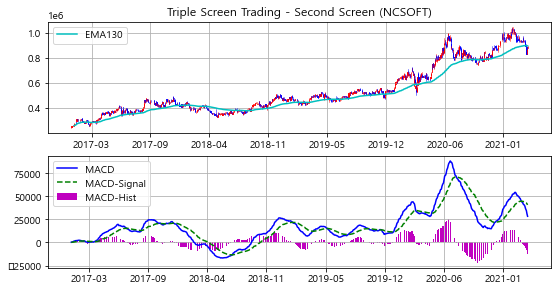

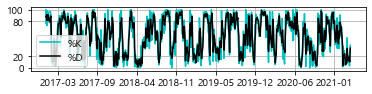

In [9]:
ndays_high = df.고가.rolling(window=14, min_periods=1).max()      # ①
ndays_low = df.저가.rolling(window=14, min_periods=1).min()        # ②
fast_k = (df.종가 - ndays_low) / (ndays_high - ndays_low) * 100  # ③
slow_d= fast_k.rolling(window=3).mean()                           # ④
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()             # ⑤

plt.figure(figsize=(9, 7))
p1 = plt.subplot(3, 1, 1)
plt.title('Triple Screen Trading - Second Screen (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')

p2 = plt.subplot(3, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')
plt.show()

p1 = plt.subplot(3, 1, 3)
plt.grid(True)
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0, 20, 80, 100]) # ⑥
plt.legend(loc='best')
plt.show()
